In [15]:
import matplotlib.pyplot as plt
import numpy as np
from pydicom import dcmread 
import cv2
import imutils
from os import listdir
from os.path import isfile, join

import seaborn as sns 
plt.rcParams["figure.figsize"] = [16,16]
sns.set_style('whitegrid')

In [82]:
FILE_PATH = "data/5/2.25.161854685893932853629999980269149638166.dcm"
SLICE_NUMBER = 26
image_slice = dcmread(FILE_PATH)
relevant_image_data = image_slice.pixel_array[SLICE_NUMBER]

In [ ]:
for i, slice in enumerate(image_slice.pixel_array):
    plt.imshow(slice, cmap=plt.cm.inferno)
    plt.title("Image"+" "+FILE_PATH.split("/")[2]+" "+"slice"+" "+str(i))
    plt.savefig(FILE_PATH.split("/")[0]+"/"+FILE_PATH.split("/")[1]+f"/{i:03n}.png")

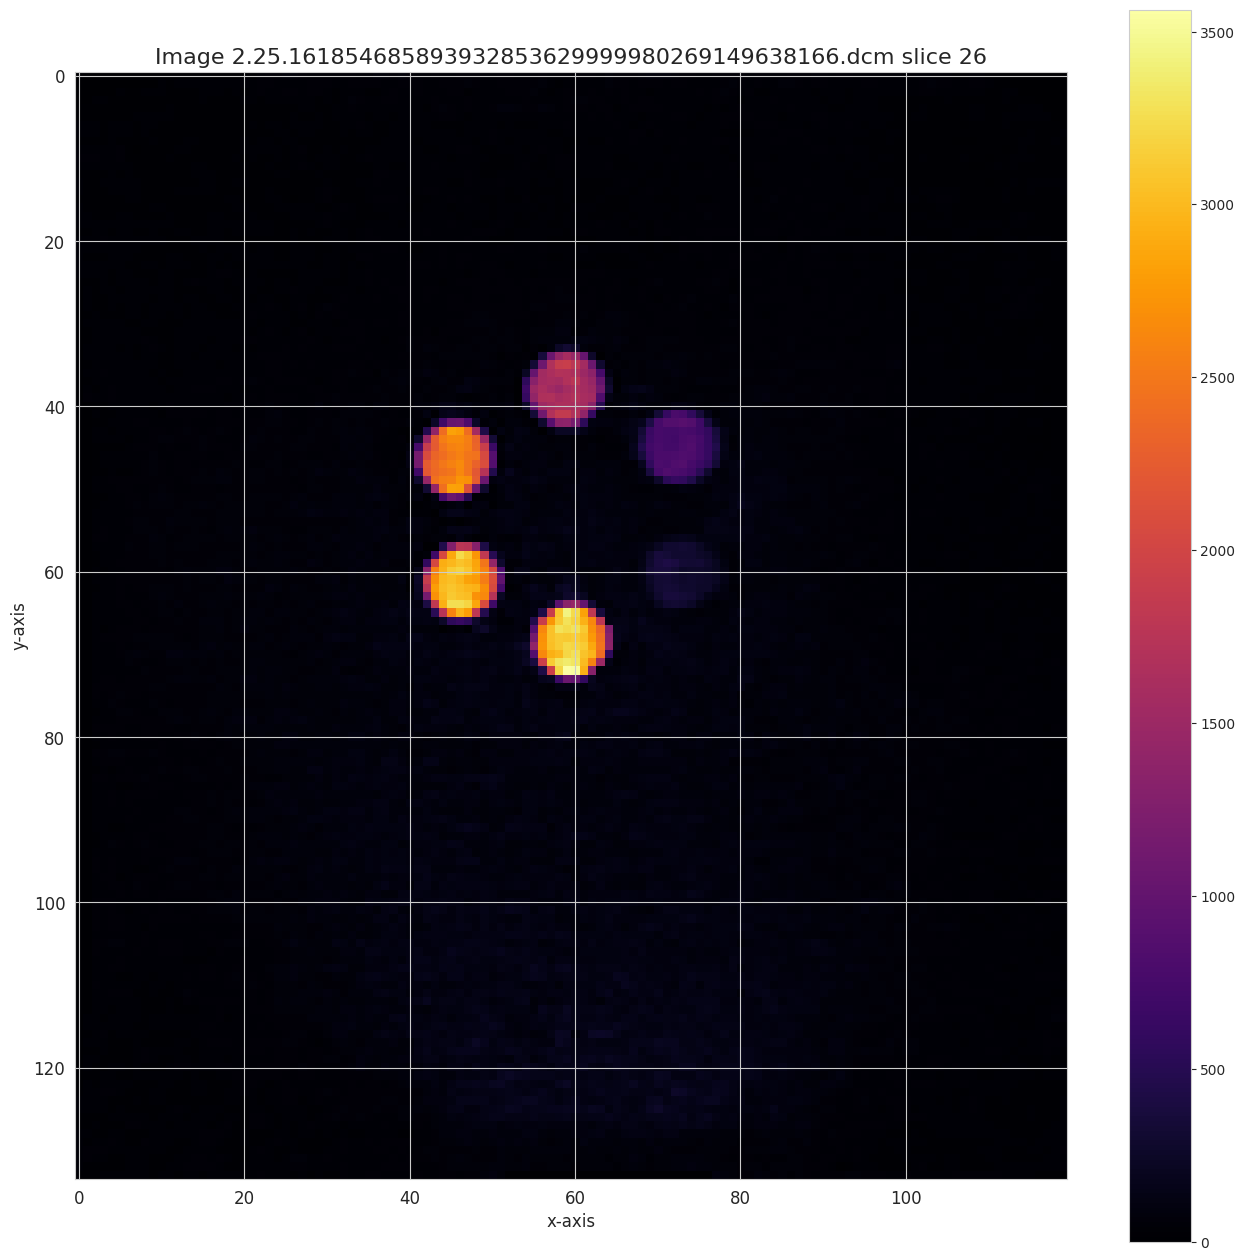

In [83]:
plt.imshow(relevant_image_data, cmap=plt.cm.inferno)
plt.title("Image"+" "+FILE_PATH.split("/")[2]+" "+"slice"+" "+str(SLICE_NUMBER),fontsize=16)
plt.xlabel("x-axis",fontsize=12)
plt.ylabel("y-axis",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.colorbar()

In [84]:
img_2d = relevant_image_data.astype(float) 
img_2d_scaled = (np.maximum(img_2d,0) / img_2d.max()) * 255.0
img_2d_scaled = np.uint8(img_2d_scaled)

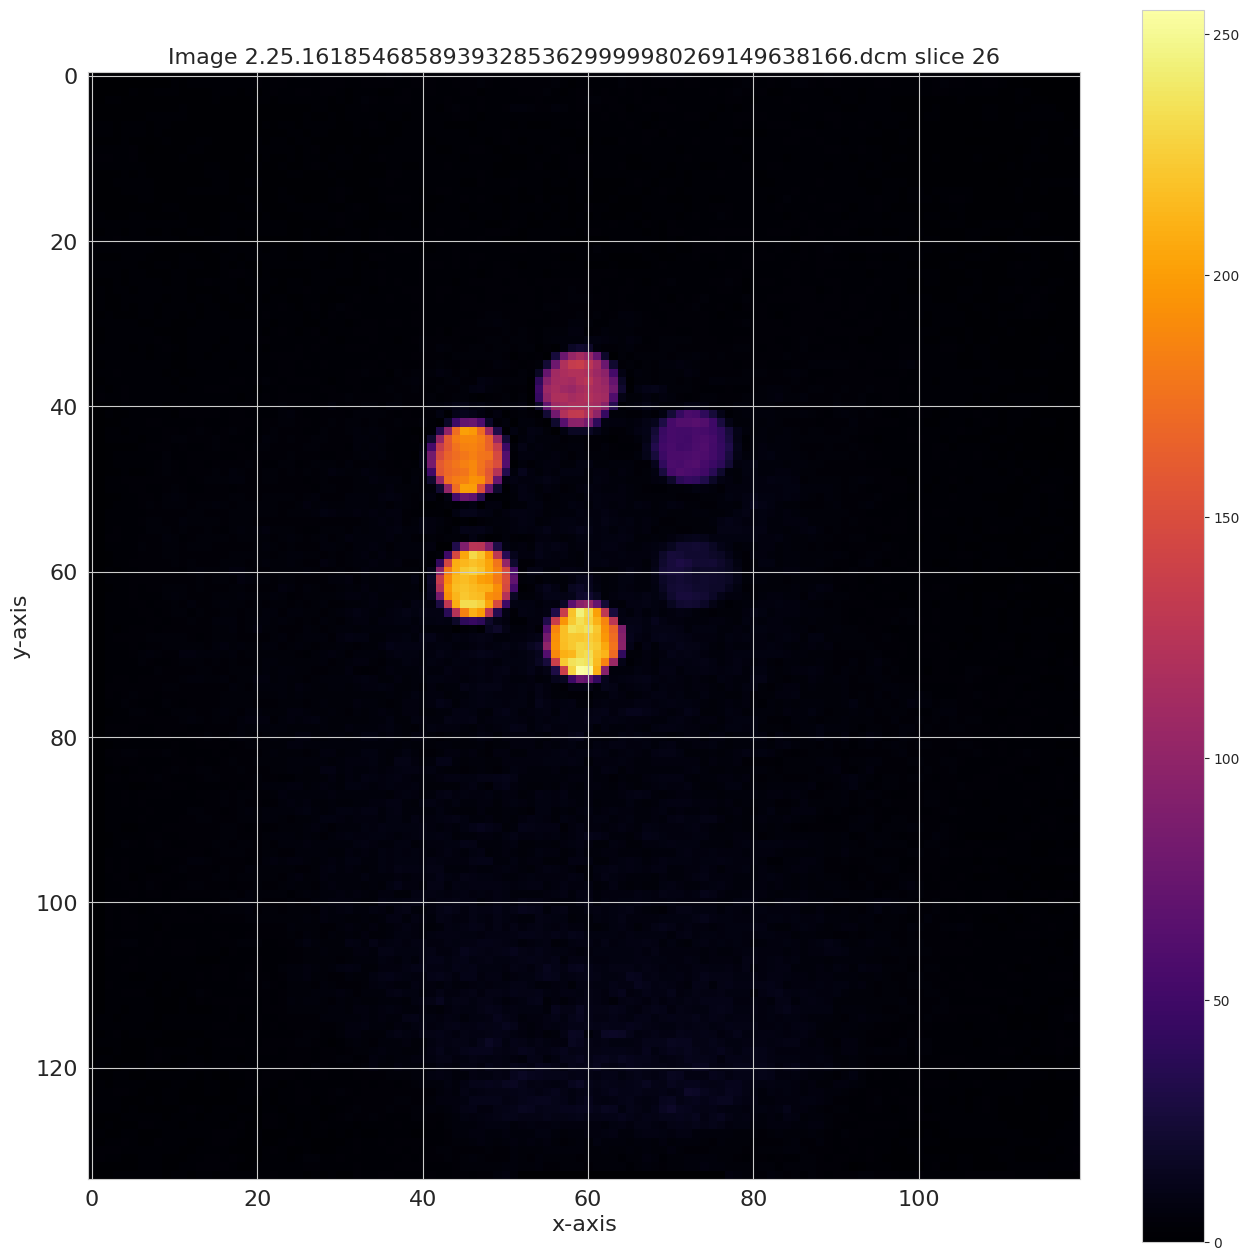

In [85]:
plt.imshow(img_2d_scaled, cmap=plt.cm.inferno)
plt.title("Image"+" "+FILE_PATH.split("/")[2]+" "+"slice"+" "+str(SLICE_NUMBER),fontsize=16)
plt.xlabel("x-axis",fontsize=16)
plt.ylabel("y-axis",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.colorbar()

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 [Text(0, -20.0, '−20'),
  Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100'),
  Text(0, 120.0, '120'),
  Text(0, 140.0, '140')])

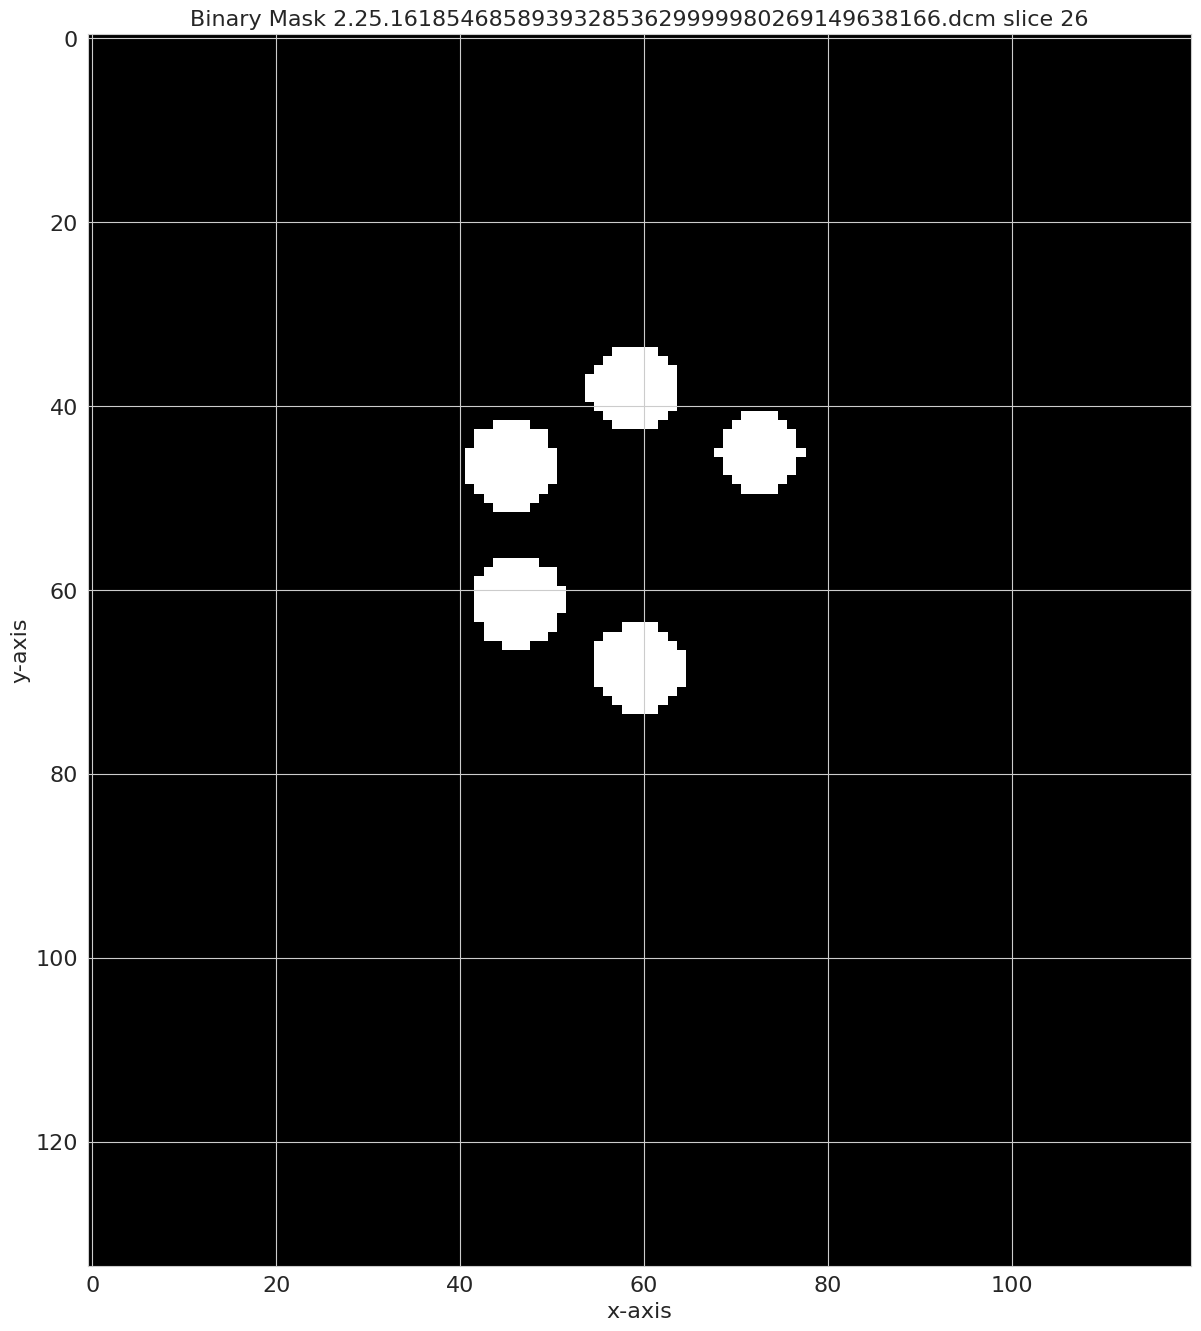

In [93]:
#create a binary mask, any pixel value above 20 will be converted to white (255)
thresh = cv2.threshold(img_2d_scaled,30,255,cv2.THRESH_BINARY)[1]
#Plot to verify the binary mask
plt.imshow(thresh, cmap=plt.cm.gray)
plt.title("Binary Mask"+" "+FILE_PATH.split("/")[2]+" "+"slice"+" "+str(SLICE_NUMBER),fontsize=16)
plt.xlabel("x-axis",fontsize=16)
plt.ylabel("y-axis",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [94]:
#finding contours for each blob
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts) #converts to tuple 

area=64.5
average_intensity=172.7051282051282
standard_deviation=65.54253052053183
area=64.5
average_intensity=159.67088607594937
standard_deviation=64.79094356134428
area=64.0
average_intensity=140.72368421052633
standard_deviation=51.727931649568035
area=50.0
average_intensity=51.28333333333333
standard_deviation=7.563270162803624
area=59.0
average_intensity=100.08333333333333
standard_deviation=25.41584698131813


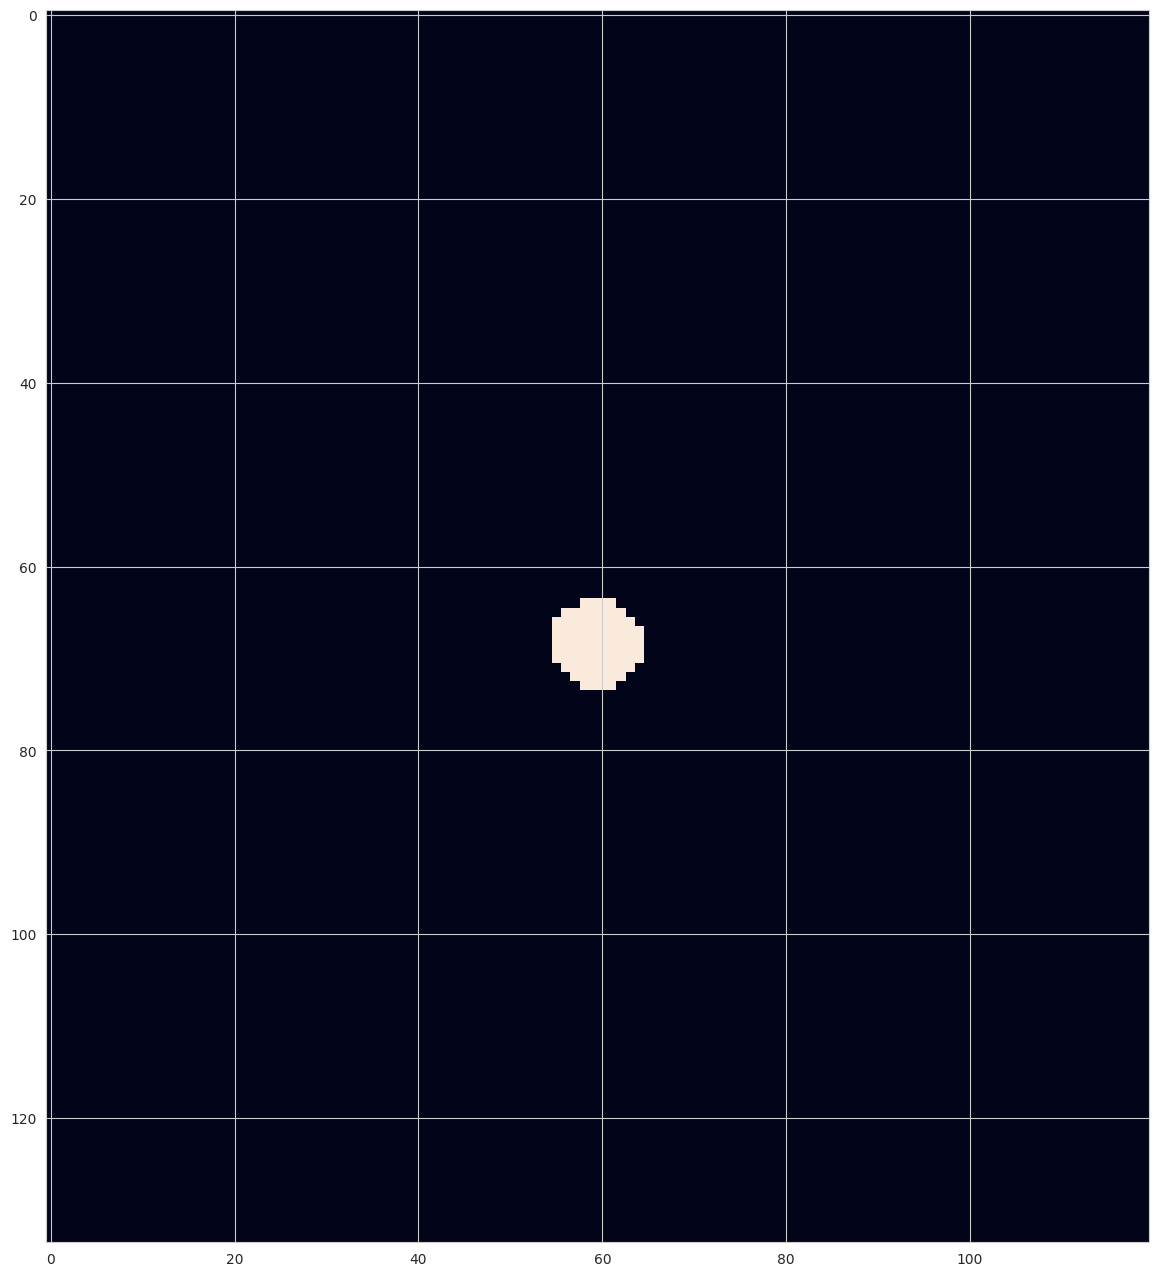

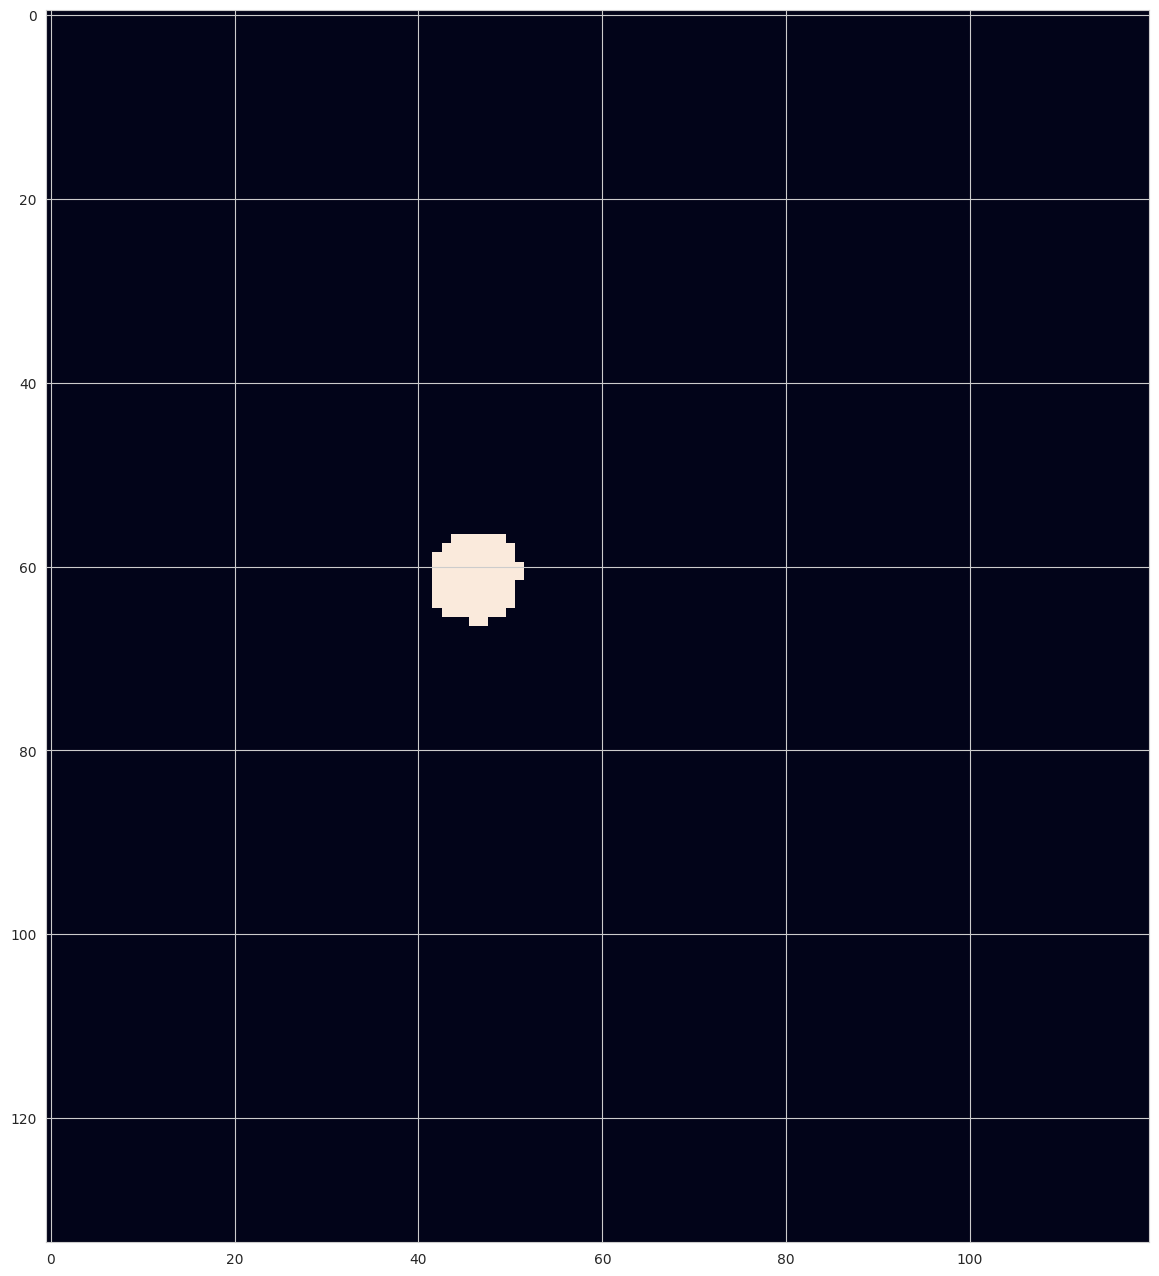

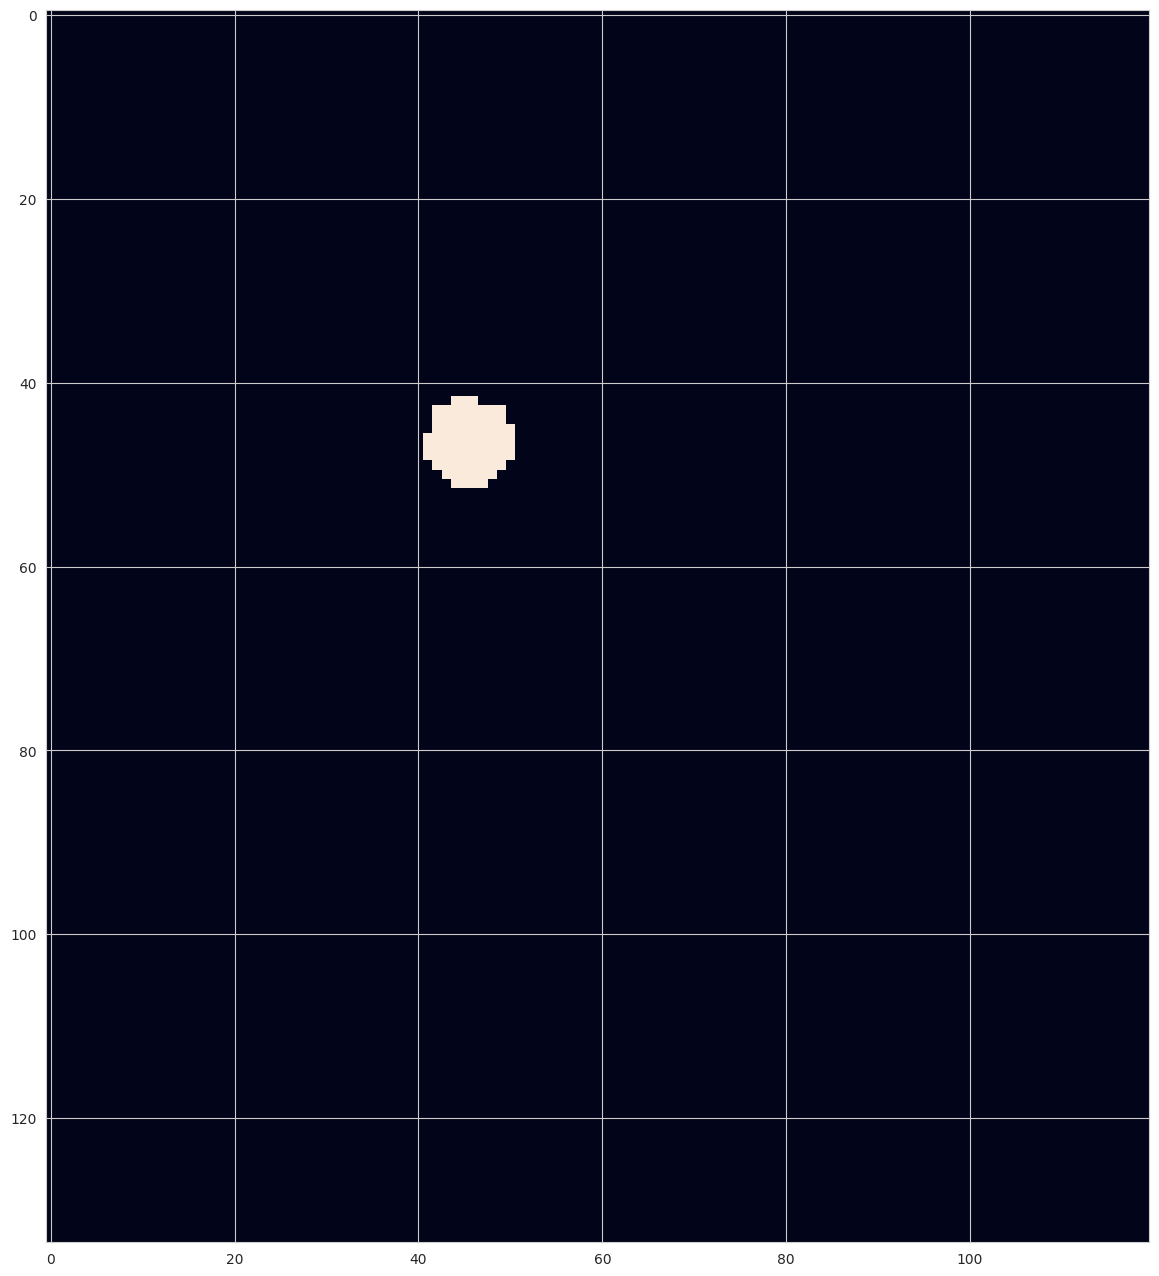

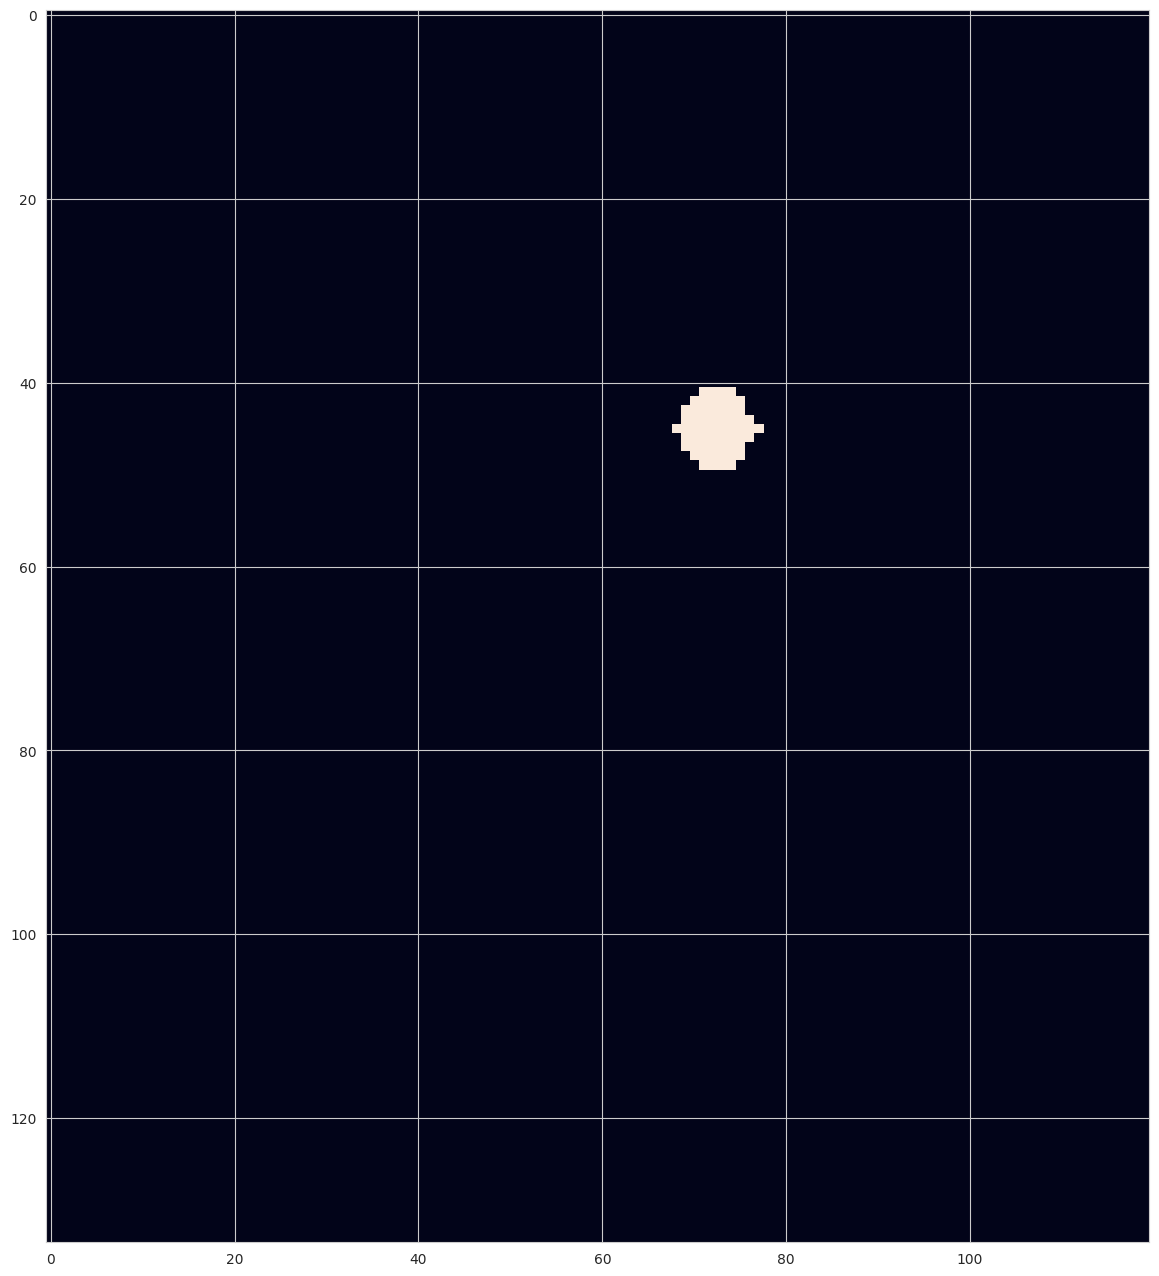

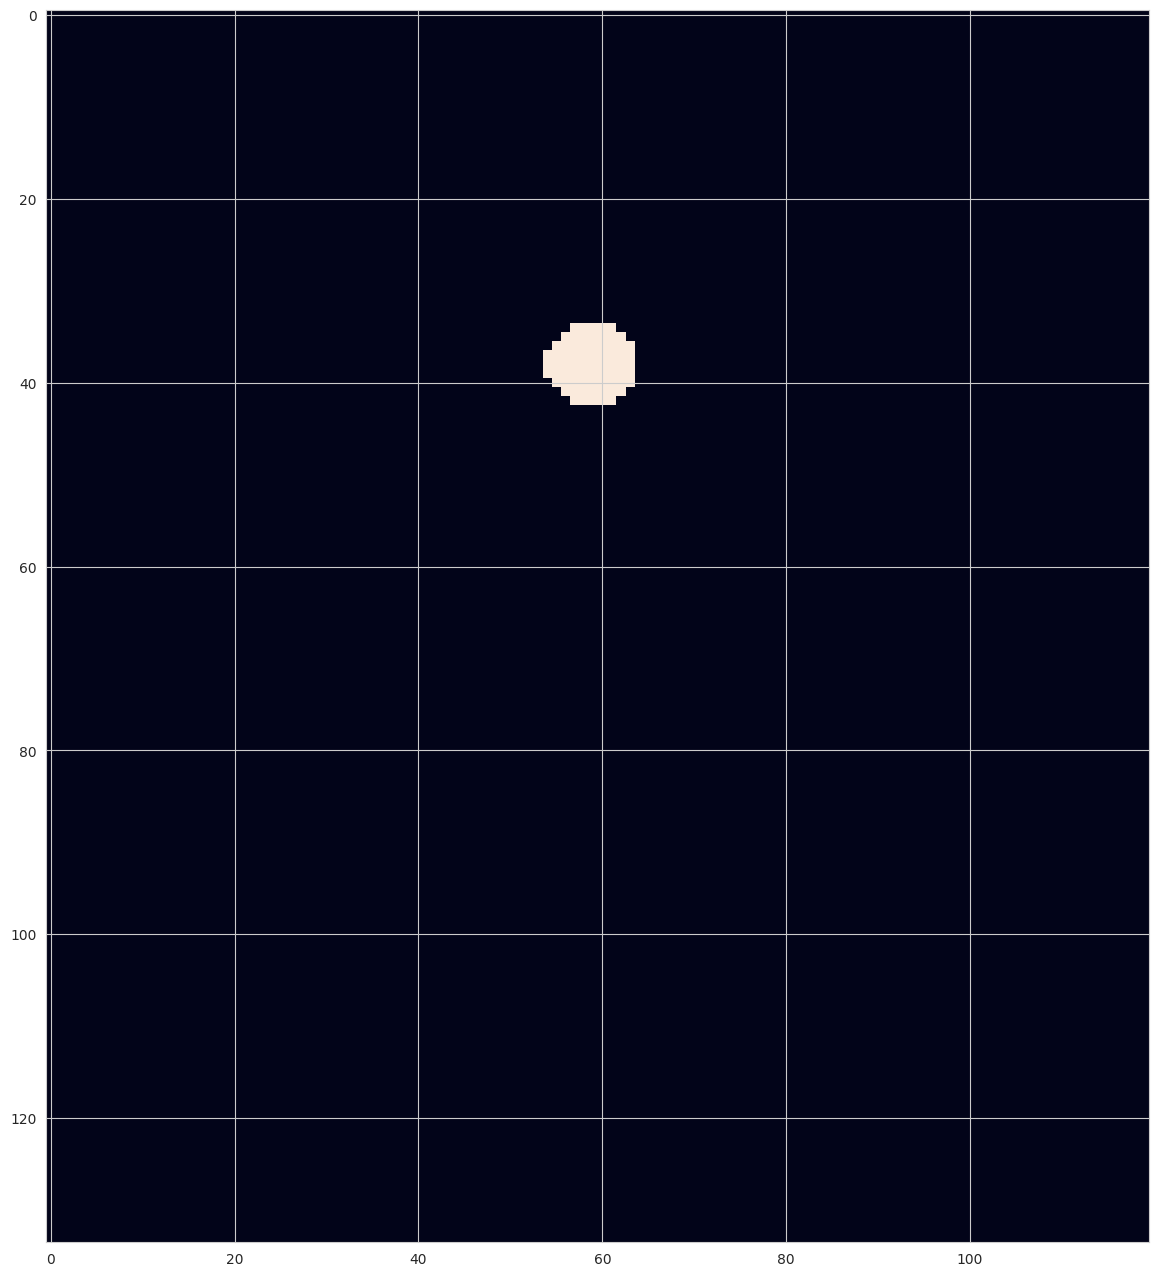

In [95]:
for c in cnts:
    # Moments
    M = cv2.moments(c)
    # Area of contour
    area=M["m00"]

    # Centroid of contour
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    # Perimeter
    perimeter = cv2.arcLength(c, True)

    print("area="+f'{area}')
    #print(f'{perimeter}')

    epsilon = 0.02 * perimeter
    approx = cv2.approxPolyDP(c, epsilon, True)
    #print(f'{approx}')

    # Create blank image
    blank_image = np.zeros(img_2d_scaled.shape, np.uint8)

    # Draw contour in the mask
    cv2.drawContours(blank_image, [approx], -1, (255, 255, 255), -1)

    # Create a mask to select pixels inside the figure
    mask_contour = blank_image == 255

    # Calculate the intensity from the grayscale image
    # filtering out the pixels where in the blank_image their value is not 255
    intensity = np.mean(img_2d_scaled[mask_contour])
    print("average_intensity="+f'{intensity}')

    #standard deviation of contour
    sd = np.std(img_2d_scaled[mask_contour])
    print("standard_deviation="+f'{sd}')

    plt.figure()
    plt.imshow(blank_image)

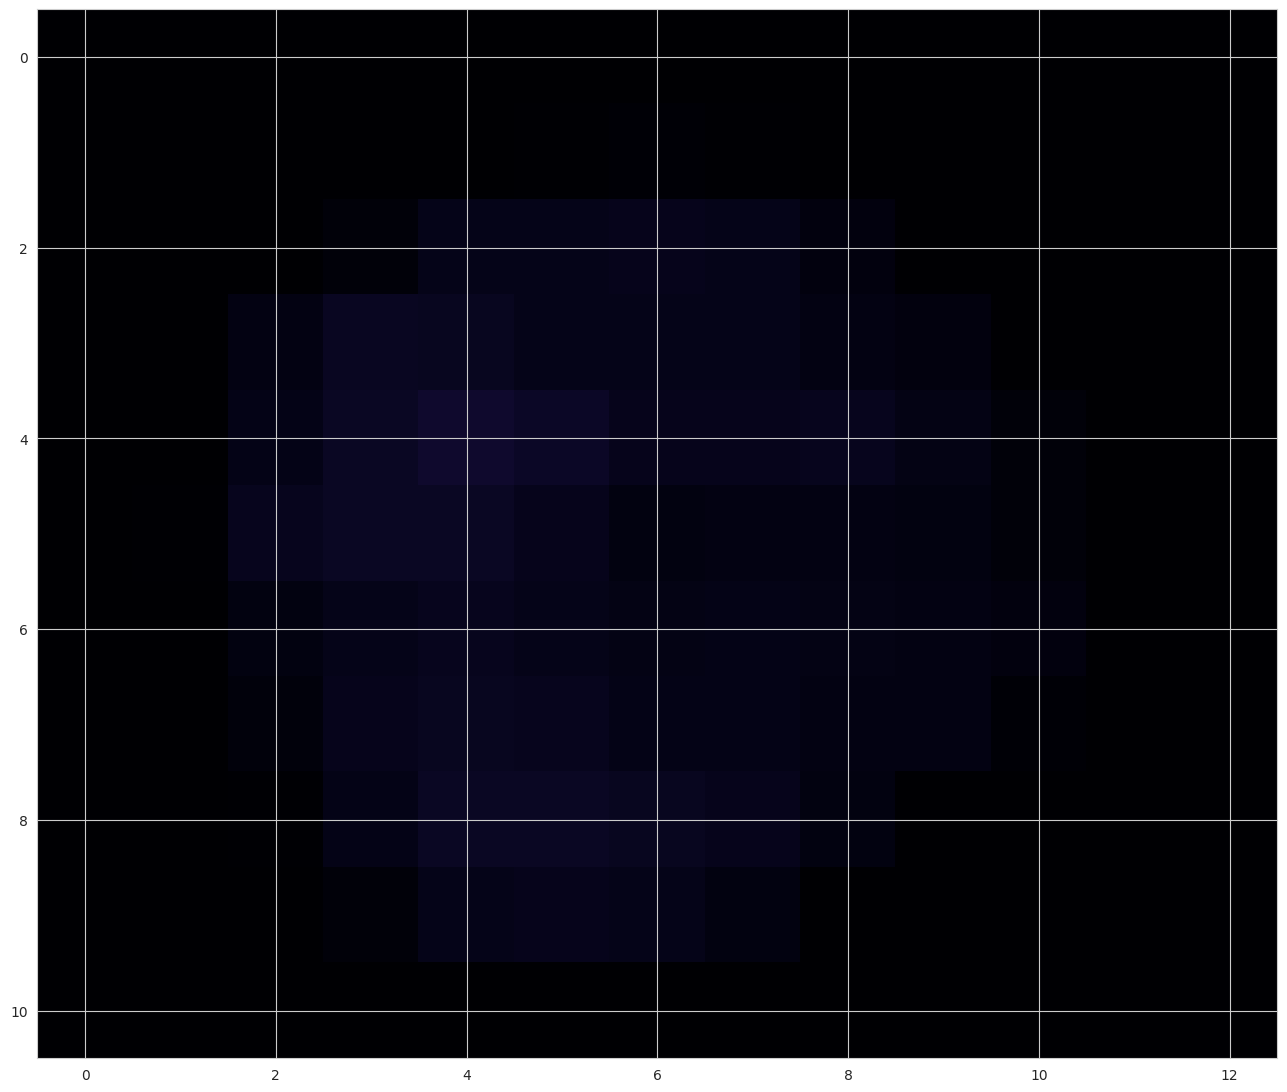

In [107]:
#plot the faintest tube #1
tube_2 = img_2d_scaled[55:66, 67:80]
plt.imshow(tube_2, cmap='inferno', vmin=10, vmax=255)
plt.show()

In [108]:
thresh_faint_tube = cv2.threshold(tube_2,10,255,cv2.THRESH_BINARY)[1]

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, -2.0, '−2'),
  Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12')])

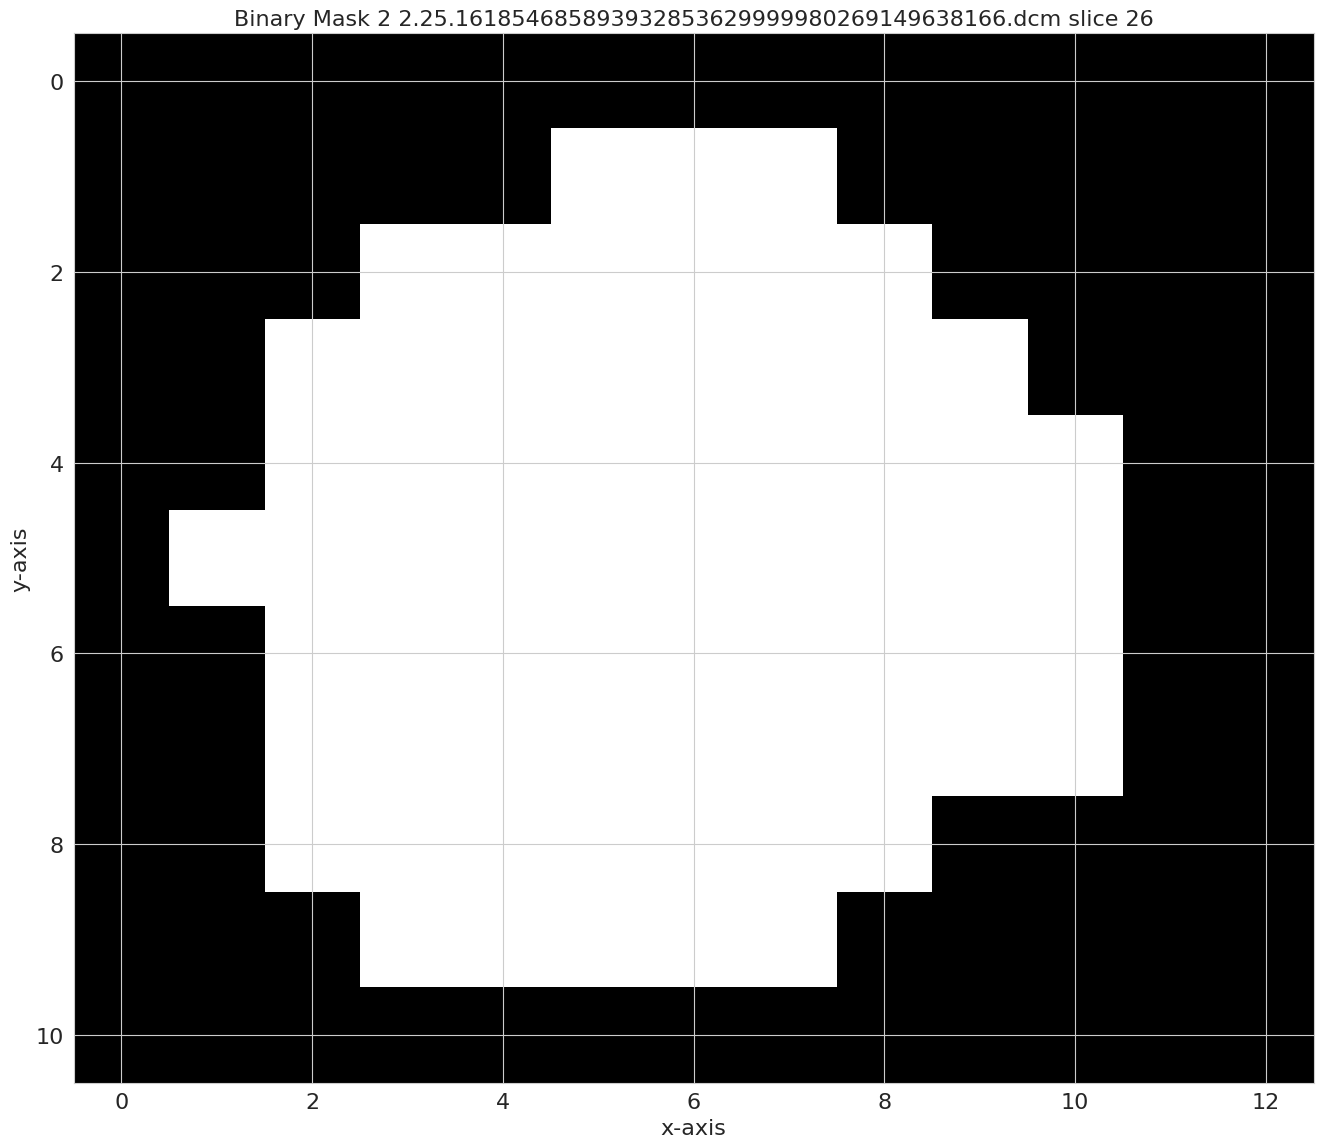

In [109]:
plt.imshow(thresh_faint_tube, cmap=plt.cm.gray)
plt.title("Binary Mask 2"+" "+FILE_PATH.split("/")[2]+" "+"slice"+" "+str(SLICE_NUMBER),fontsize=16)
plt.xlabel("x-axis",fontsize=16)
plt.ylabel("y-axis",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [110]:
cnts_faint_tube = cv2.findContours(thresh_faint_tube, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts_faint_tube = imutils.grab_contours(cnts_faint_tube)

area=53.0
average_intensity=1.289855072463768
standard_deviation=0.6393259420322545


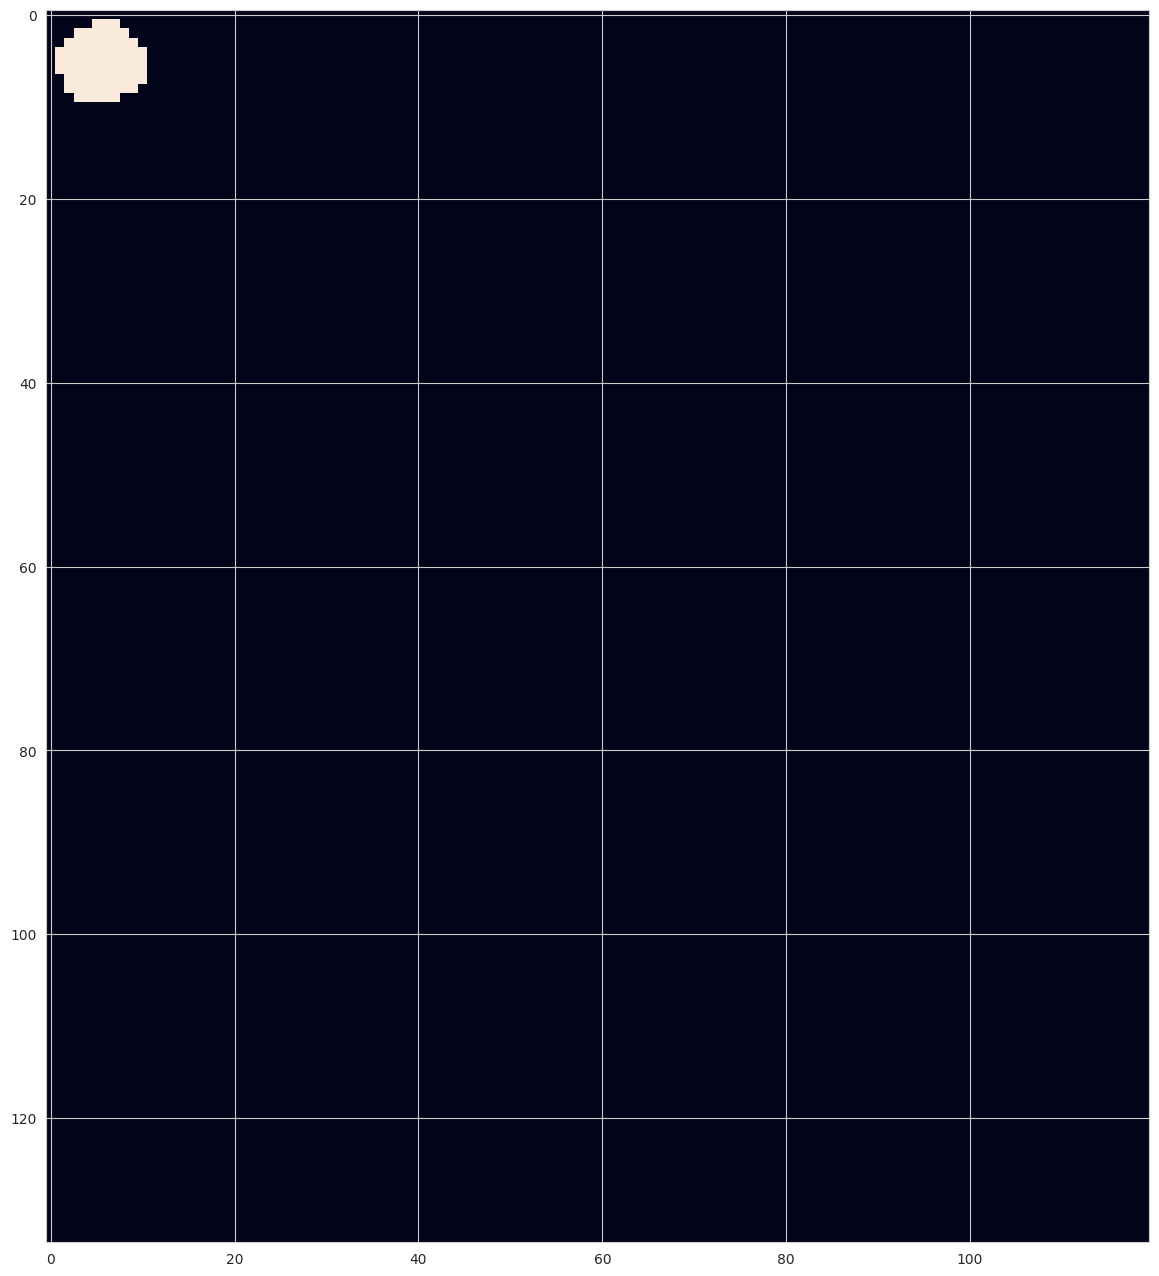

In [111]:
for c in cnts_faint_tube:
    # Moments
    M = cv2.moments(c)
    # Area of contour
    area=M["m00"]

    # Centroid of contour
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    # Perimeter
    perimeter = cv2.arcLength(c, True)

    print('area='+f'{area}')
    #print(f'{perimeter}')

    epsilon = 0.02 * perimeter
    approx = cv2.approxPolyDP(c, epsilon, True)
    #print(f'{approx}')

    # Create blank image
    blank_image = np.zeros(img_2d_scaled.shape, np.uint8)

    # Draw contour in the mask
    cv2.drawContours(blank_image, [approx], -1, (255, 255, 255), -1)

    # Create a mask to select pixels inside the figure
    mask_contour = blank_image == 255

    # Calculate the intensity from the grayscale image
    # filtering out the pixels where in the blank_image their value is not 255
    intensity = np.mean(img_2d_scaled[mask_contour])
    print('average_intensity='+f'{intensity}')

    #standard deviation of contour
    sd = np.std(img_2d_scaled[mask_contour])
    print("standard_deviation="+f'{sd}')

    plt.figure()
    plt.imshow(blank_image)